**Purpose:** Build an artificial neural network to classify iris species\
**Author:** Tamim Ahsan\
**Date:** 17 January 2026

# 1. Import packages and explore data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

In [2]:
# Download the dataset from kaggle
!curl -L -o /content/iris.zip https://www.kaggle.com/api/v1/datasets/download/uciml/iris

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3687  100  3687    0     0   6611      0 --:--:-- --:--:-- --:--:--  6611


In [3]:
# Unzip the file
!unzip /content/iris.zip

Archive:  /content/iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [4]:
# Read the file
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# The dimensions of the dataset
iris.shape

(150, 6)

In [6]:
# Column names
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Number of samples per species
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


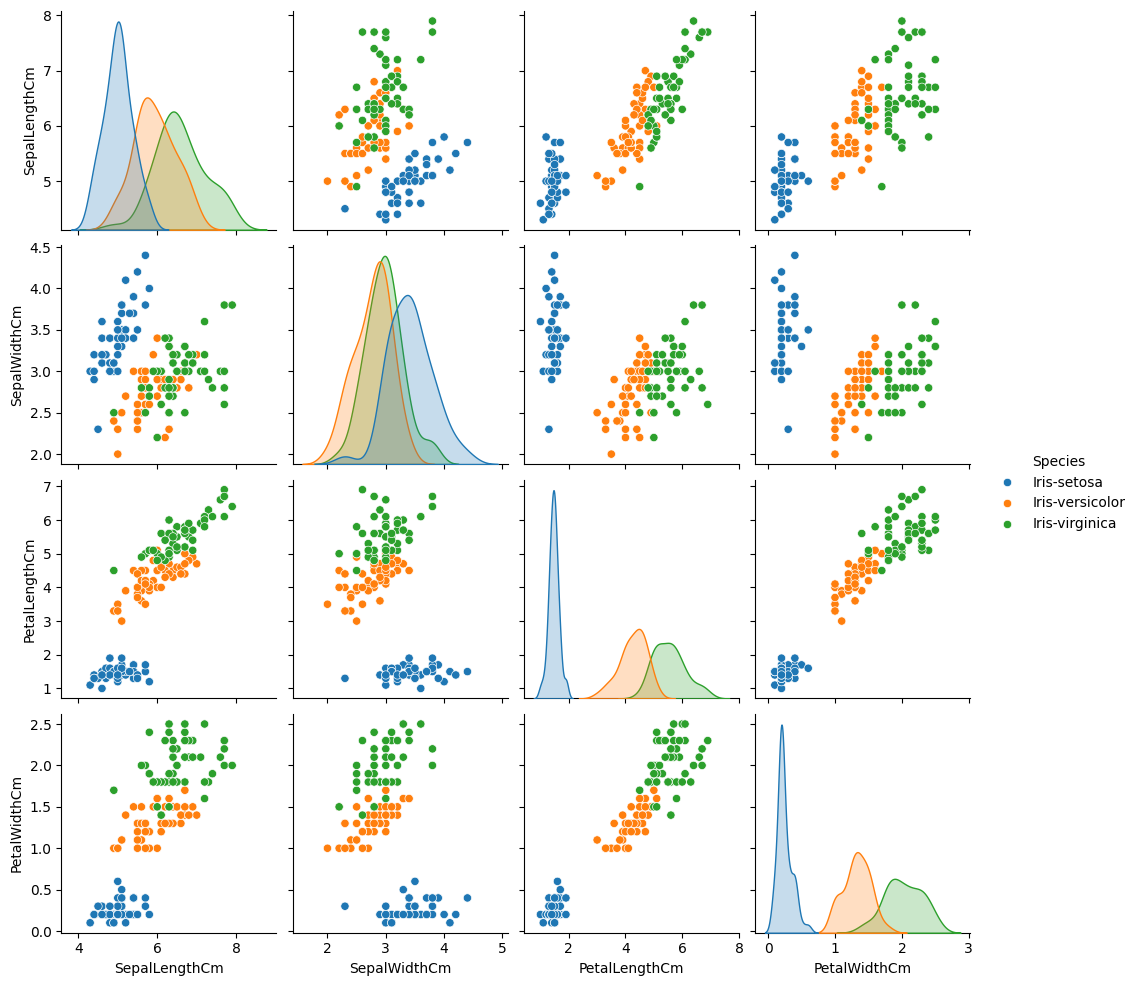

In [8]:
# Plot the numerical variables
# To see if they have discriminatory power
sns.pairplot(data = iris[iris.columns[1:]], hue = "Species")

<Axes: >

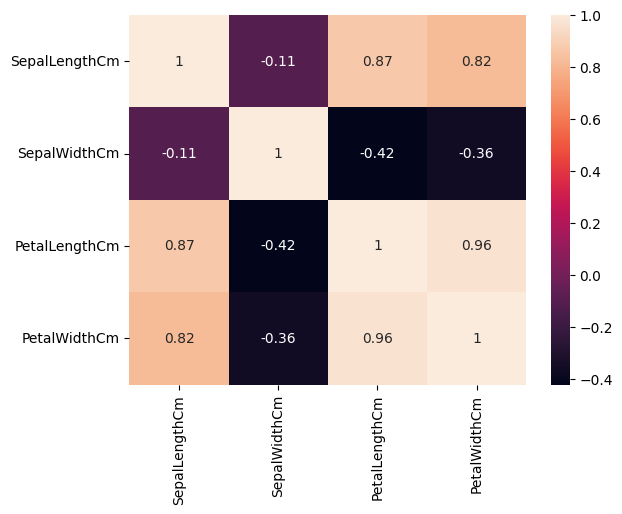

In [9]:
# Correlation among the variables
sns.heatmap(iris[iris.columns[1:5]].corr(), annot = True)

# 2. Preprocess the data

In [10]:
# Encode the labels
label_encoder = preprocessing.LabelEncoder()
iris["Species"] = label_encoder.fit_transform(iris["Species"])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
# Convert the dataframe to numpy array
iris_array = iris.to_numpy()
iris_array

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01, 0.00e+00],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01, 0.00e+00],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01, 0.00e+00],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01, 0.00e+00],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01, 0.00e+00],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01, 0.00e+00],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01, 0.00e+00],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01, 0.00e+00],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01, 0.00e+00],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01, 0.00e+00],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01, 0.00e+00],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01, 0.00e+00],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01, 0.00e+00],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01, 0.00e+00],
       [1.50e+01, 5.80e+00, 4.00e+

In [12]:
# Separate features and labels
x_data = iris_array[:, 1:5]
y_data = iris_array[:, 5]

In [13]:
# Standardize the numeric variables
scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)
x_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [14]:
# One-hot encoding of the label
y_data = tf.keras.utils.to_categorical(y_data, num_classes = 3)
y_data

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
# Split the training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

# 3. Model fitting

In [16]:
# create the model
model = models.Sequential([
    layers.Dense(128, activation = "relu", name = "hidden_layer_1", input_shape = (4,)),
    layers.Dense(128, activation = "relu", name = "hidden_layer_2"),
    layers.Dense(3, activation = "softmax", name = "output_layer")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [18]:
# Look at the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
n_epochs = 50
batch_size = 16
is_verbose = 1
val_split = 0.2

with tf.device("/device:GPU:0"):
  history = model.fit(
      x_train,
      y_train,
      epochs = n_epochs,
      batch_size = batch_size,
      verbose = is_verbose,
      validation_split = val_split
      )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.3734 - loss: 1.0790 - val_accuracy: 0.6667 - val_loss: 0.9116
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8530 - loss: 0.8150 - val_accuracy: 0.6250 - val_loss: 0.7539
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8815 - loss: 0.6243 - val_accuracy: 0.6250 - val_loss: 0.6440
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8287 - loss: 0.5048 - val_accuracy: 0.6250 - val_loss: 0.5727
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8366 - loss: 0.4441 - val_accuracy: 0.7083 - val_loss: 0.5240
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8891 - loss: 0.3364 - val_accuracy: 0.7083 - val_loss: 0.4915
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8832 - loss: 0.3203 - val_accuracy: 0.7083 - val_loss: 0.4583
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8490 - loss: 0.3004 - val_accuracy: 0.7500 - val_loss: 0.4329

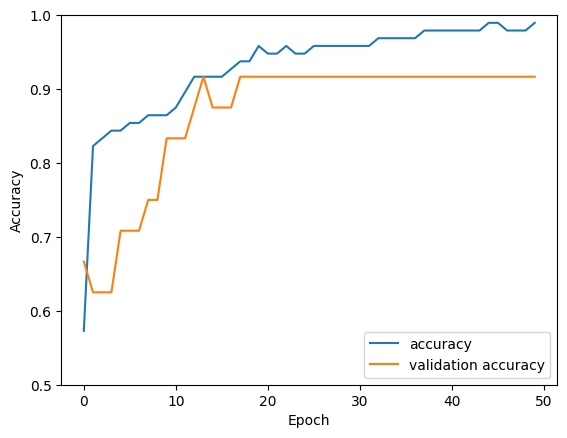

In [20]:
# Plot the accuracy
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right")

**Comment:** Maybe around 20 epochs was enough

In [21]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy = {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9333 - loss: 0.1064
Test accuracy = 0.9333333373069763


# 4. Model prediction

In [22]:
# Raw input
input_data = np.array([[5.1, 3.5, 1.4, 0.2]])

# Scale the raw input
scaled_input = scaler.transform(input_data)

# Raw prediction probabilities
pred_prob = model.predict(scaled_input)
print(f"Prediction probabilities = {pred_prob}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Prediction probabilities = [[9.9985957e-01 1.3405716e-04 6.3390435e-06]]


In [23]:
# The best prediction
prediction = np.argmax(pred_prob)
print("The predicted species is", label_encoder.inverse_transform([prediction])[0])

The predicted species is Iris-setosa
